In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [2]:
df_jan = pd.read_parquet('fhv_tripdata_2021-01.parquet')
df_feb = pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [3]:
df_jan.shape

(1154112, 7)

# Q1. 1154112

In [4]:
df_jan.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [5]:
df_jan['duration'] = df_jan.dropOff_datetime - df_jan.pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds() / 60)

df_feb['duration'] = df_feb.dropOff_datetime - df_feb.pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda td: td.total_seconds() / 60)


In [6]:
df_jan['duration'].mean()

19.1672240937939

# Q2. 19.16

/home/karla/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

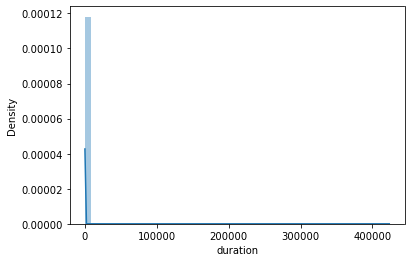

In [7]:
sns.distplot(df_jan['duration'])

In [8]:
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]

df_jan.shape

(1109826, 8)

In [9]:
total_dropped = 1154112 - 1109826
print(total_dropped)

44286


/home/karla/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

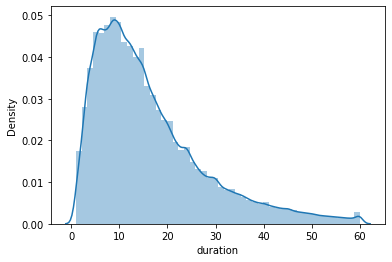

In [10]:
sns.distplot(df_jan['duration'])

In [11]:
percentageofnan = 100*df_jan['PUlocationID'].isna().sum()/df_jan['PUlocationID'].shape[0]
print(percentageofnan)

83.52732770722618


# Q3. 83%

In [12]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)

df_feb['PUlocationID'] = df_feb['PUlocationID'].fillna(-1)

In [13]:
df_jan['DOlocationID'] = df_jan['DOlocationID'].fillna(-1)

df_feb['DOlocationID'] = df_feb['DOlocationID'].fillna(-1)

In [14]:
categorical = ['PUlocationID', 'DOlocationID']

df_jan[categorical] = df_jan[categorical].astype(str)

df_feb[categorical] = df_feb[categorical].astype(str)

In [15]:
train_dicts = df_jan[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [16]:
X_train.shape

(1109826, 525)

# Q4. 525

In [17]:
target = 'duration'
y_train = df_jan[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107213159

# Q5. 10.52

In [19]:
val_dicts = df_feb[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [21]:
y_val = df_feb[target].values

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.01428321291995

# Q6. 11.01

/home/karla/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/karla/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


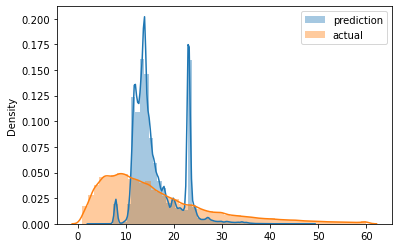

In [18]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()